In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.2Y8F3U_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
(262, 350, 3) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


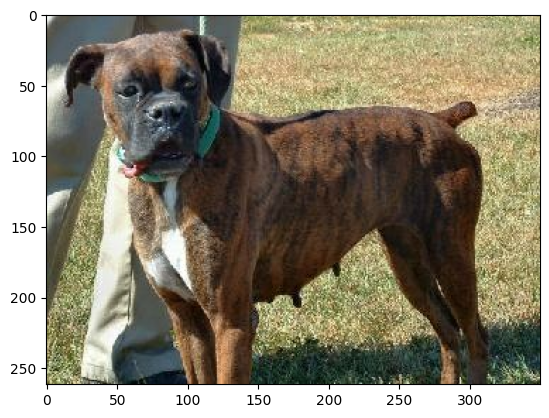

In [ ]:
dataset = tfds.load('cats_vs_dogs', split='train', as_supervised=True)

for image, label in dataset.take(1):
  plt.imshow(image)
  print(image.shape, label)
  print(label)

In [ ]:
IMG_SIZE = 150

In [ ]:
def resize_normalize(image, label):
  # resize the image
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  # normalize the image
  image = (image / 255.0)
  return image, label

In [ ]:
dataset = dataset.map(resize_normalize)

(150, 150, 3) tf.Tensor(1, shape=(), dtype=int64)


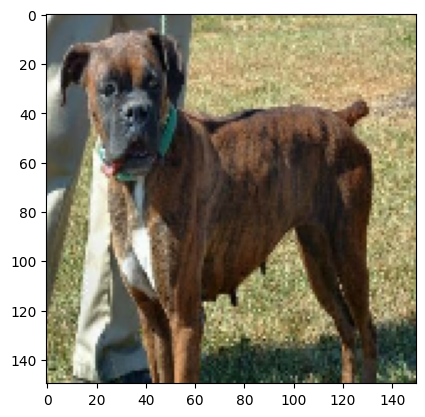

In [ ]:
for image, label in dataset.take(1):
  plt.imshow(image)
  print(image.shape, label)

In [ ]:
image, label = next(iter(dataset))

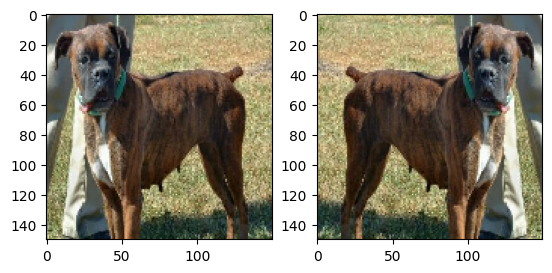

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(tf.image.flip_left_right(image))

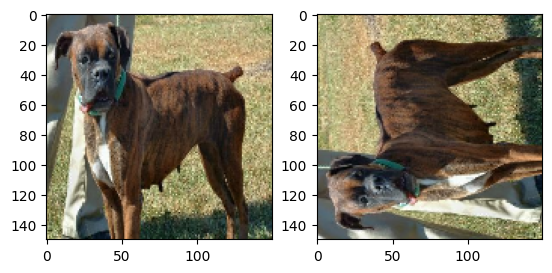

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(tf.image.rot90(image))

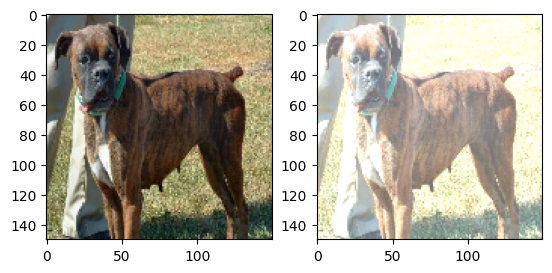

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(tf.image.random_brightness(image, max_delta=0.5))

In [ ]:
def augment(image, label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.rot90(image)
  #image = tf.image.random_contrast(image, lower=0.2, upper=0.8)
  image = tf.image.random_brightness(image, max_delta=0.5)
  return image, label

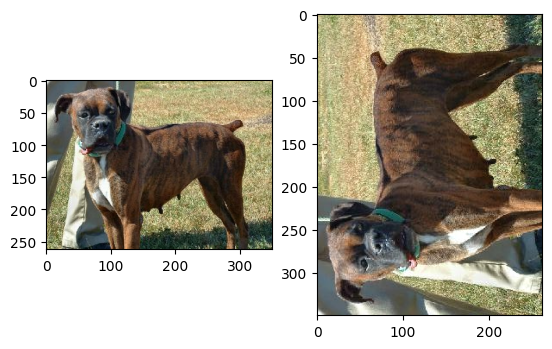

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(augment(image, label)[0])